# Q to C Lecture 3: Basic Qiskit 02/15/2023

###Part 0: Import Qiskit

In [ ]:
pip install qiskit

In [ ]:
import numpy as np
from math import pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.exceptions import QiskitError
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# We are using this library to suppress some warning messages
import warnings
warnings.filterwarnings("ignore")

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
# Or, if you want to run locally run the line below
# provider = IBMQ.enable_account('TOKEN')

###Part 1: Basic Qiskit

####1.1 - Creating Quantum Circuits (Together)

Create a quantum circuit `qc` with 1 qubit and 0 classical bits. Add an X gate to this circuit, and finally draw it. Then call `visualize_transition(qc, trace=True)` on the circuit.

Hint: We create circuits with `QuantumCircuit(n, m)`, where n = number of qubits and m = number of classical bits.

In [ ]:
# We'll use the syntax of calling our circuits qc_ij, where i is the part and j 
#  is the exercise. For this case, 1.1 => qc_11.
qc_11 = QuantumCircuit(1)

qc_11.x(0)

qc_11.draw()

┌───┐
q: ┤ X ├
   └───┘

####1.2 - Measurements on Quantum Circuits (Together)

Create a quantum circuit `qc` with 2 qubits and 2 classical bits. Add an H gate to the 0th qubit, and a CNOT with the 0th qubit as the control. Then measure both qubits using `qc.measure([0, 1], [0, 1])`, and finally draw it.

Hint: We add CNOTs using `qc.cx(i, j)`, where i is the control and j is the target. We call this an "i to j CNOT".

In [ ]:
qc_12 = QuantumCircuit(2, 2)

qc_12.h(0)
qc_12.cx(0, 1)
qc_12.measure([0, 1], [0, 1])

qc_12.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

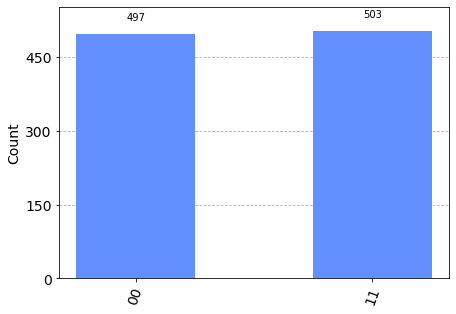

In [ ]:
# QASM Simulator code
sim = provider.get_backend('ibmq_qasm_simulator')
# For simple circuits, 1000 shots is fine. For larger circuits we may need more
#  like 10000+. As with all random sampling, the Central Limit Theorem applies.
#  We will get into these histograms more in lecture 4, for now just take them 
#  as is.
job = execute(qc_12, backend=sim, shots=1000)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

####1.3 - Wider Quantum Circuits (Individual)

Create a quantum circuit `qc` with 16 qubits and 16 classical bits. Add an H gate to the even qubits, and a CNOT between neighboring qubits (i.e. 0 to 1, 1 to 2, etc). Then draw the circuit.

Hint: You'll probably want to use a for-loop here. Don't worry, they behave exactly like normal.

In [ ]:
qc_13 = QuantumCircuit(16, 16)

for i in range(16):
  if i%2 == 0:
    qc_13.h(i)
    qc_13.cx(i, i+1)
  qc_13.measure(i, i)

# Alternatively, you can measure every qubit by using qc.measure_all(), just 
#  make sure you have enough classical bits as well.

qc_13.draw()

┌───┐     ┌─┐                                             
 q_0: ┤ H ├──■──┤M├─────────────────────────────────────────────
      └───┘┌─┴─┐└╥┘┌─┐                                          
 q_1: ─────┤ X ├─╫─┤M├──────────────────────────────────────────
      ┌───┐└───┘ ║ └╥┘┌─┐                                       
 q_2: ┤ H ├──■───╫──╫─┤M├───────────────────────────────────────
      └───┘┌─┴─┐ ║  ║ └╥┘┌─┐                                    
 q_3: ─────┤ X ├─╫──╫──╫─┤M├────────────────────────────────────
      ┌───┐└───┘ ║  ║  ║ └╥┘┌─┐                                 
 q_4: ┤ H ├──■───╫──╫──╫──╫─┤M├─────────────────────────────────
      └───┘┌─┴─┐ ║  ║  ║  ║ └╥┘┌─┐                              
 q_5: ─────┤ X ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
      ┌───┐└───┘ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_6: ┤ H ├──■───╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q_7: ─────┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      ┌───┐└───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
 q_8: ┤ H ├──■───╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
      └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
 q_9: ─────┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
      ┌───┐└───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
q_10: ┤ H ├──■───╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
      └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
q_11: ─────┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
      ┌───┐└───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
q_12: ┤ H ├──■───╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
      └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
q_13: ─────┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ┌───┐└───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_14: ┤ H ├──■───╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      └───┘┌─┴─┐ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_15: ─────┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
           └───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 16/═══════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

####1.4 - Deeper Quantum Circuits (Individual)

Create a quantum circuit `qc` with 1 qubit and 0 classical bits. Add 20 X gates to the qubit and call `visualize_transition(qc, trace=True, fpg=1)`. Then repeat this process with 21 X gates and compare the results.

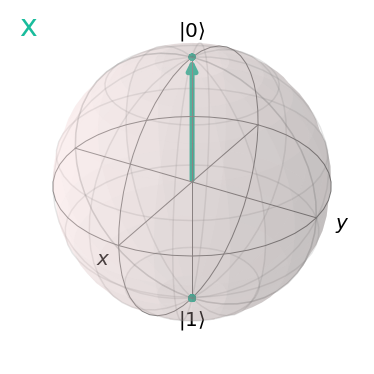

In [ ]:
# 20 X Gates
qc_14a = QuantumCircuit(1)

# This will result in the same state as we start with, because 20%2 = 0, and 
#  every 2 X gates cancel out.
for i in range(20):
  qc_14a.x(0)

# fpg stands for 'Frames Per Gate', and essentially controls how smooth the
#  animation is. Lower numbers are less smooth, but render faster.
visualize_transition(qc_14a, trace=True, fpg=1)

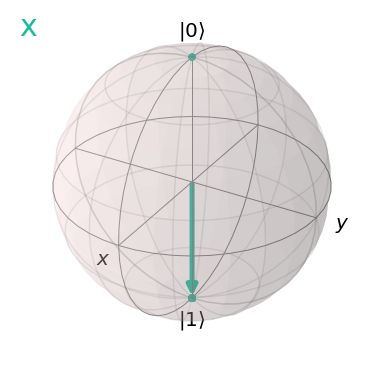

In [ ]:
# 21 X Gates
qc_14b = QuantumCircuit(1)

# This will result in an overall bit flip, because 21%2 = 1, and every 2 X gates
#  cancel out.
for i in range(21):
  qc_14b.x(0)

visualize_transition(qc_14b, trace=True, fpg=1)

###Part 2: Parametrized Gates

####2.1 - H-Gate Revisited (Together)

Recreate the quantum circuit `qc` from part 1.2. This time, rather than using an an H gate directly, recreate the H gate using RX and RZ.

Hint: RX and RZ are called using `qc.rx(θ, qubit)` and `qc.rz(θ, qubit)`.

In [ ]:
qc_21 = QuantumCircuit(2, 2)

qc_21.rx(pi/2, 0)
qc_21.rz(pi/2, 0)
qc_21.cx(0, 1)
qc_21.measure([0, 1], [0, 1])

qc_21.draw()

┌─────────┐┌─────────┐     ┌─┐   
q_0: ┤ Rx(π/2) ├┤ Rz(π/2) ├──■──┤M├───
     └─────────┘└─────────┘┌─┴─┐└╥┘┌─┐
q_1: ──────────────────────┤ X ├─╫─┤M├
                           └───┘ ║ └╥┘
c: 2/════════════════════════════╩══╩═
                                 0  1

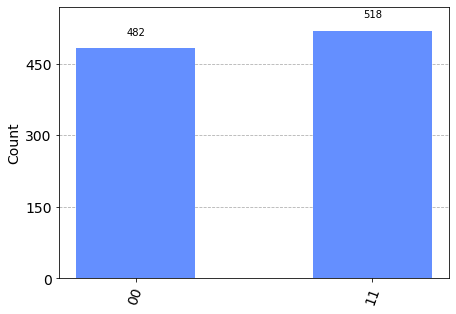

In [ ]:
# QASM Simulator code
sim = provider.get_backend('ibmq_qasm_simulator')

job = execute(qc_21, backend=sim, shots=1000)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

####2.2 - Arbitrary Parameters (Individual)

Recreate the quantum circuit `qc` from part 2.1. This time, however, try to make a superposition that isn't 50/50. You can do this still using RX and RZ.

In [ ]:
qc_22 = QuantumCircuit(2, 2)

qc_22.rx(pi/4, 0)
qc_22.rz(pi/2, 0)
qc_22.cx(0, 1)
qc_22.measure([0, 1], [0, 1])

qc_22.draw()

┌─────────┐┌─────────┐     ┌─┐   
q_0: ┤ Rx(π/4) ├┤ Rz(π/2) ├──■──┤M├───
     └─────────┘└─────────┘┌─┴─┐└╥┘┌─┐
q_1: ──────────────────────┤ X ├─╫─┤M├
                           └───┘ ║ └╥┘
c: 2/════════════════════════════╩══╩═
                                 0  1

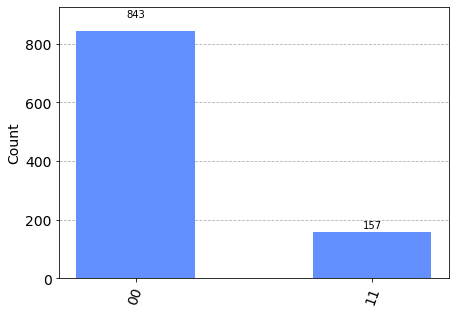

In [ ]:
# QASM Simulator code
sim = provider.get_backend('ibmq_qasm_simulator')

job = execute(qc_22, backend=sim, shots=1000)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

####2.3 - Universal Gate (Individual)

This last exercise is moreso just for fun. Using the universal gate `qc.u(θ,Φ,λ,qubit)`, create 1-qubit circuit and apply an arbitrary unitary gate. Then, visualize what happens by running the simulation.

Hint: You're overthinking this, just plug in whatever for the angles and see what comes out!

In [ ]:
qc_23 = QuantumCircuit(2,2)

qc_23.u(pi/3, pi/5, pi/7, 0)

qc_23.cx(0, 1)
qc_23.measure([0, 1], [0, 1])

qc_23.draw()

┌────────────────┐┌─┐
q_0: ┤ U(π/3,π/5,π/7) ├┤M├
     └──────┬─┬───────┘└╥┘
q_1: ───────┤M├─────────╫─
            └╥┘         ║ 
c: 2/════════╩══════════╩═
             1          0

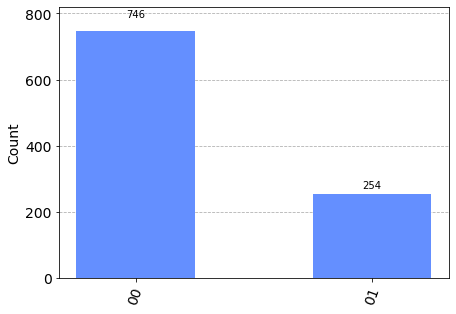

In [ ]:
# QASM Simulator code
sim = provider.get_backend('ibmq_qasm_simulator')

job = execute(qc_23, backend=sim, shots=1000)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)